In [1]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('/home/romy.beaute/projects/hypnomed/diffusion_embedding/helper_functions/')
sys.path.append('/mnt/data/romy/hypnomed/git/diffusion_embedding/helper_functions/')
from viz import *

import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt 
# image modules
from PIL import Image
import matplotlib.image as mpimg 

from scipy.io import loadmat
import nilearn
import nilearn.plotting
import numpy as np
import nibabel as nib
import pandas as pd
import os 

# os.chdir('/mnt/data/romy/hypnomed/git/diffusion_embedding/visualize_emb_output')
# print(os.getcwd())


# sys.path.append('/home/romy.beaute/projects/hypnomed/diffusion_embedding/')
# sys.path.append('/mnt/data/romy/hypnomed/git/diffusion_embedding/')

# from emb_matrices.emb_matrices import *
sys.path.append('../')
from helpers import *

In [11]:



####### TO DEFINE #######
gradients_for = 'states' #'blocks'
if gradients_for == 'states':
    emb_condition = 'control_meditation_hypnose'
else: #gradients_for == 'blocks' (controling for order effect)
    emb_condition = 'run-1_run-2_run-3'


#########################

npy_folder = '/mnt/data/romy/hypnomed/git/diffusion_embedding/emb_outputs/emb_output_{}'.format(gradients_for)

mesh = 'fsaverage5' #the low-resolution fsaverage5 mesh (10242 nodes = vertices per hemisphere)
fsaverage_path = '/mnt/data/romy/packages/freesurfer/subjects/{}/label'.format(mesh)
image_output_folder = '/mnt/data/romy/hypnomed/git/diffusion_embedding/visualize_emb_output/images_gradients/{}'.format(gradients_for) #where to store the visualisations of the gradient(s)



# Load Freesurfer fsaverage surface with read_label : return array with indices of vertices included in label
lab_lh = nib.freesurfer.read_label(fsaverage_path+'/lh.cortex.label') #shape = (9361,)
lab_rh = 10242 + nib.freesurfer.read_label(fsaverage_path+'/rh.cortex.label') #shape = (9361,)
lab= np.concatenate((lab_lh,lab_rh))


df = pd.read_csv('/mnt/data/romy/hypnomed/git/diffusion_embedding/scripts/subject_list.txt', header=None) #list of the subjects we have

sublist = np.asarray(df).flatten()
print(len(sublist))


if len(sublist) > 1:
    prefix = 'group' #group-level analysis
    image_folder = os.path.join(image_output_folder,prefix)
else:
    prefix = sublist[0] #indiv-level analysis
    image_folder = os.path.join(image_output_folder+'/indivs',prefix)
print('Gradient for : ',prefix)

image_folder = os.path.join(image_output_folder,prefix)
if not os.path.isdir(image_folder):
    os.makedirs(image_folder)

mat_folder = '/mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/{}'.format(prefix)
if not os.path.isdir(mat_folder):
    os.makedirs(mat_folder)

indiv_emb_states = emb_condition.split('_')
print(indiv_emb_states)


In [13]:
indiv_emb_state = 'control_meditation_hypnose'
mat_file = mat_folder+'/{}_{}_embedding.mat'.format(prefix, indiv_emb_state)
print(mat_file)

b = loadmat(mat_file)
print('Loading ',mat_file)

print(70*'-')
print('Description {} : '.format(mat_file))
# for k in b.keys():
#     print('- {} :\n {}\n'.format(k,b[k]))
print('- b embedding shape : ',b['emb'].shape)
print('     ---> n_subjects = ',b['emb'].shape[0])
print('     ---> n_nodes = ',b['emb'].shape[1])
print('     ---> n_dimensions = ',b['emb'].shape[2])
print(70*'-')

b['emb'].shape  #(n_subjects,n_nodes,n_dims)
n_dims = b['emb'].shape[2]



/mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat
Loading  /mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat
----------------------------------------------------------------------
Description /mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat : 
- b embedding shape :  (119, 18715, 5)
     ---> n_subjects =  119
     ---> n_nodes =  18715
     ---> n_dimensions =  5
----------------------------------------------------------------------


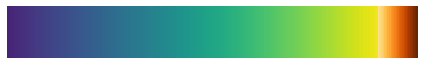

In [2]:
def imageCrop(filename):

    from PIL import Image

    i1 = Image.open(filename)
    i2 = np.array(i1)
    i2[i2.sum(axis=2) == 255*4,:] = 0
    i3 = i2.sum(axis=2)
    x = np.where((i3.sum(axis=1) != 0) * 1)[0]
    y = np.where((i3.sum(axis=0) != 0) * 1)[0]

    result = Image.fromarray(i2[x.squeeze()][:,y.squeeze()])
    result.save(filename)



def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, 0.2, 0.95)

#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = int((128*2)-np.round(255*(1.-0.90)))
second = (256-first)
#colors2 = new_cmap(np.linspace(0, 1, first))
colors2 = plt.cm.viridis(np.linspace(0.1, .98, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.25, 1, second))
colors4 = plt.cm.PuBu(np.linspace(0., 0.5, second))
#colors4 = plt.cm.pink(np.linspace(0.9, 1., second))
# combine them and build a new colormap
cols = np.vstack((colors2,colors3))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

# Visualize surfaces

In [ ]:
n_dims = 2

for dim in range(n_dims):

    a = np.zeros(20484) #size concatenated vertices from fsaverage5 template
    mean_embs = np.mean(b['emb'],axis=0) #mean embeddings for each dimension, across subjects (axis=0 signifies avg across subjects, which is the first dimension of b)
    a[lab]=np.mean(b['emb'],axis=0)[:,dim] #check if corresponds to 1st gradient

    surf_mesh_l = '/mnt/data/romy/packages/freesurfer/subjects/fsaverage5/surf/lh.inflated' #Surface mesh geometry
    stat_map_l = a[:10242] #Statistical map to be displayed on the surface mesh

    surf_mesh_r = '/mnt/data/romy/packages/freesurfer/subjects/fsaverage5/surf/rh.inflated' #Surface mesh geometry
    stat_map_r = a[10242:] #Statistical map to be displayed on the surface mesh

    title_r='Diffusion_Map_{}_rh_Dim#{}'.format(indiv_emb_state,dim+1)
    title_l='Diffusion_Map_{}_lh_Dim#{}'.format(indiv_emb_state,dim+1)


    nilearn.plotting.plot_surf_stat_map(surf_mesh_l,stat_map_l,bg_on_stat=True,showall=True,colorbar=True,cmap='jet', vmax=5.5,title=title_l,bg_scaling_factor=1.5)
    nilearn.plotting.plot_surf_stat_map(surf_mesh_r,stat_map_r,bg_on_stat=True,showall=True,colorbar=True,cmap='jet', vmax=5.5,title=title_r,bg_scaling_factor=1.5)

    # nilearn.plotting.plot_surf_stat_map('/mnt/data/romy/packages/freesurfer/subjects/fsaverage5/surf/rh.inflated',a[10242:],colorbar=True, cmap='jet', vmax=5.5,title='{}_diffusion_map_{}_rh_DIMENSION#{}'.format(prefix,indiv_emb_state,dim+1))


# Scatterplot of first two dimensions


In [14]:
import matplotlib.cm as cm
import seaborn as sns

sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)
df = pd.DataFrame()



outliers_indxs = [15,27,32,40]
outliers_indxs_hyp = [15,27,39]
outliers_indxs_reshaped = [x-1 for x in outliers_indxs]
outliers_indxs_reshaped_hypnosis = [x-1 for x in outliers_indxs if x<32]+[x-2 for x in outliers_indxs if x>32]



indiv_emb_state = 'control_meditation_hypnose'
mat_file = mat_folder+'/{}_{}_embedding.mat'.format(prefix, indiv_emb_state)
print(mat_file)

b = loadmat(mat_file)
print('Loading ',mat_file)

print(70*'-')
print('Description {} : '.format(mat_file))
# for k in b.keys():
#     print('- {} :\n {}\n'.format(k,b[k]))
print('- b embedding shape : ',b['emb'].shape)
print('     ---> n_subjects = ',b['emb'].shape[0])
print('     ---> n_nodes = ',b['emb'].shape[1])
print('     ---> n_dimensions = ',b['emb'].shape[2])
print(70*'-')

b_emb = b['emb']

emb_con = np.delete(b_emb[:40],outliers_indxs_reshaped,0)
emb_med = np.delete(b_emb[40:80],outliers_indxs_reshaped,0)
emb_hyp = np.delete(b_emb[80:],outliers_indxs_reshaped_hypnosis,0)

embeddings = {'control':emb_con,'meditation':emb_med,'hypnose':emb_hyp}

def scatters(embeddings):
    for condition in embeddings.keys():
        emb = embeddings[condition]
        a = np.zeros(20484) #size concatenated vertices from fsaverage5 template
        mean_embs = np.mean(emb,axis=0) #mean embeddings for each dimension, across subjects (axis=0 signifies avg across subjects, which is the first dimension of b)

        lab_lh = nib.freesurfer.read_label(fsaverage_path+'/lh.cortex.label') #shape = (9361,)
        lab_rh = 10242 + nib.freesurfer.read_label(fsaverage_path+'/rh.cortex.label') #shape = (9361,)
        lab = np.concatenate((lab_lh,lab_rh))

        a[lab]=np.mean(emb,axis=0)[:,0] #corresponds to 1st gradient

        dimensions = ['e0','e1']

        df[dimensions[0]] =  np.mean(emb,axis=0)[:,0] #first dimension
        df[dimensions[1]] = np.mean(emb,axis=0)[:,1] * -1 #second condition, -1 to reorient the plot

        norm_1 = mpl.colors.Normalize(vmin=df['e0'].min(), vmax=df['e0'].max())
        cmap_1 = cm.Purples #cm.Reds
        map_1 = cm.ScalarMappable(norm=norm_1, cmap=cmap_1)

        norm_2 = mpl.colors.Normalize(vmin=df['e1'].min(), vmax=df['e1'].max())
        cmap_2 = cm.Greens
        map_2 = cm.ScalarMappable(norm=norm_2, cmap=cmap_2)

        norm_3 = mpl.colors.Normalize(vmin=df['e1'].max() * -1, vmax=df['e1'].min() * -1)
        cmap_3 = cm.Blues
        map_3= cm.ScalarMappable(norm=norm_3, cmap=cmap_3)

        c = np.ones(map_1.to_rgba(df['e0']).shape)

        a = df['e1'].copy()
        a = a - a.min() 
        a = a / a.max()
        c[:,1] = a

        a = df['e1'].copy() * -1
        a = a - a.min() 
        a = a / a.max()
        c[:,2] = a

        a = df['e0'].copy()
        a = a - a.min() 
        a = a / a.max()
        c[:,0] = a
        c[:,1] = c[:,1] * ((a - 1) *  -1)
        c[:,2] = c[:,2] * ((a - 1) *  -1)
        sns.set_context(font_scale=2)
        g = (sns.jointplot(data=df, 
                        x = 'e1',
                        y='e0',
                        height=10, 
                        label='{} condition : Scatterplot of the first 2 dimensions (n={} subjects)'.format(condition,emb.shape[0]), 
                        linewidth=0, marker='.', 
                        #palette = dic,
                        #color=np.array(c), 
                        joint_kws={'color':None, 'c':c.tolist()},
                        alpha=0.8,
                        ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], 
                        xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5]).set_axis_labels('Gradient 2', 'Gradient 1'))

/mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat
Loading  /mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat
----------------------------------------------------------------------
Description /mnt/data/romy/hypnomed/git/diffusion_embedding/emb_matrices/group/group_control_meditation_hypnose_embedding.mat : 
- b embedding shape :  (119, 18715, 5)
     ---> n_subjects =  119
     ---> n_nodes =  18715
     ---> n_dimensions =  5
----------------------------------------------------------------------


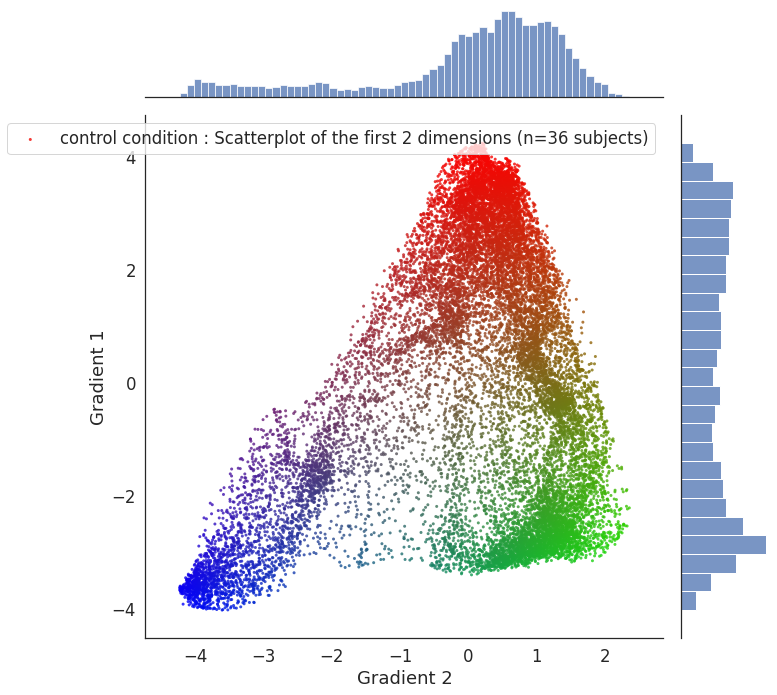

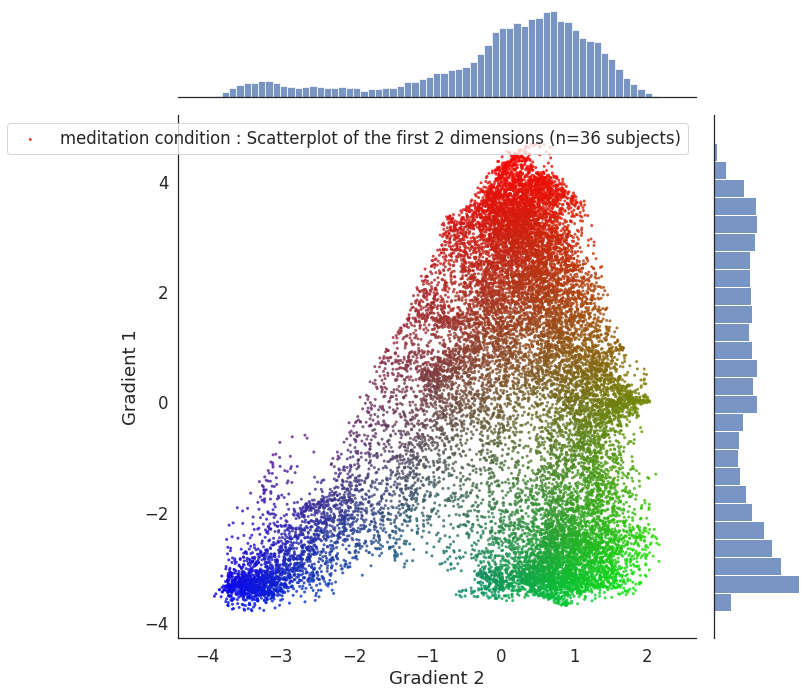

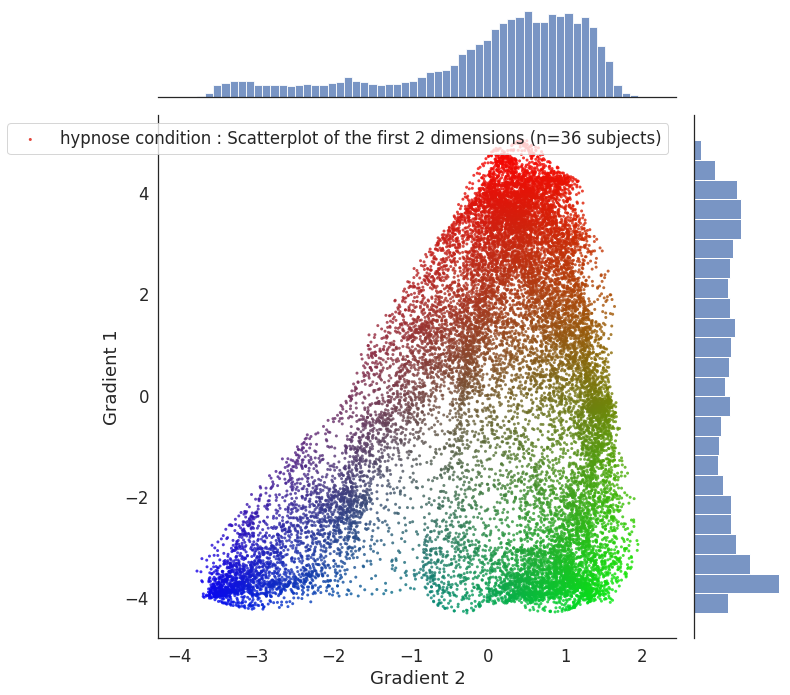

In [15]:
scatters(embeddings)

### Correspondance Marguiles notion / perso notations : 

- cortL = lab_lh
- cort = lab_rh
- cortLen = lab

In [16]:
from plot_helpers import *

images_path = os.path.join(os.getcwd(),'scatter_embedded')

list_scatters = os.listdir(images_path)
list_titles = [list_scatters[t].split('.')[0] for t in range(len(list_scatters))]
path_images = [os.path.join(images_path,list_scatters[im]) for im in range(len(list_scatters))]


FileNotFoundError: [Errno 2] No such file or directory: '/home/romy.beaute/projects/hypnomed/diffusion_embedding/scatter_embedded'

In [ ]:
my_dpi = 300
fig = plt.figure(figsize=(15, 15), dpi=my_dpi)

# ============ AX1 ============ 
# PIL Image
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("Control")
ax1.set_xlabel('Gradient 2')
ax1.set_ylabel('Gradient 1')
ax1.set_xticks([])
ax1.set_yticks([])
pil_img = Image.open(path_images[0])
ax1.imshow(pil_img)

# ============ AX1 ============ 
# PIL Image
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("Hypnose")
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Y label')
ax2.set_xticks([])
ax2.set_yticks([])
pil_img = Image.open(path_images[1])
ax2.imshow(pil_img)

# ============ AX2 ============ 
# mpimg image
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("Meditation")
ax3.set_xticks([])
ax3.set_yticks([])
mpimg_img = mpimg.imread(path_images[3]) 
ax3.imshow(mpimg_img)



impath = "/home/romy.beaute/projects/hypnomed/diffusion_embedding/visualize_emb_output/scatter_embedded"
fig.savefig(impath+"/scatterplots_states.jpg", dpi='figure', bbox_inches='tight')

In [ ]:
my_dpi = 300
fig = plt.figure(figsize=(15, 15), dpi=300)

# ============ AX1 ============ 
# PIL Image
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("Run-1")
ax1.set_xlabel('Gradient 2')
ax1.set_ylabel('Gradient 1')
ax1.set_xticks([])
ax1.set_yticks([])
pil_img = Image.open(path_images[4])
ax1.imshow(pil_img)

# ============ AX1 ============ 
# PIL Image
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("Run-2")
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Y label')
ax2.set_xticks([])
ax2.set_yticks([])
pil_img = Image.open(path_images[5])
ax2.imshow(pil_img)

# ============ AX2 ============ 
# mpimg image
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("Run-3")
ax3.set_xticks([])
ax3.set_yticks([])
mpimg_img = mpimg.imread(path_images[2]) 
ax3.imshow(mpimg_img)

impath = "/home/romy.beaute/projects/hypnomed/diffusion_embedding/visualize_emb_output/scatter_embedded"
fig.savefig(impath+"/scatterplots_blocks.jpg", dpi='figure', bbox_inches='tight')

In [ ]:
my_dpi = 300
fig = plt.figure(figsize=(15, 15), dpi=my_dpi)

# ================================= STATES =================================


# ============ AX1 ============ 
# PIL Image
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("Control")
# ax1.set_xlabel('Gradient 2')
# ax1.set_ylabel('Gradient 1')
ax1.set_xticks([])
ax1.set_yticks([])
pil_img = Image.open(path_images[0])
ax1.imshow(pil_img)

# ============ AX1 ============ 
# PIL Image
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("Hypnose")
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Y label')
ax2.set_xticks([])
ax2.set_yticks([])
pil_img = Image.open(path_images[1])
ax2.imshow(pil_img)

# ============ AX2 ============ 
# mpimg image
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("Meditation")
ax3.set_xticks([])
ax3.set_yticks([])
mpimg_img = mpimg.imread(path_images[3]) 
ax3.imshow(mpimg_img)



# ================================= BLOCKS =================================


# ============ AX1 ============ 
# PIL Image
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title("Run-1")
ax4.set_xlabel('Gradient 2')
ax4.set_ylabel('Gradient 1')
ax4.set_xticks([])
ax4.set_yticks([])
pil_img = Image.open(path_images[4])
ax4.imshow(pil_img)

# ============ AX1 ============ 
# PIL Image
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title("Run-2")
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Y label')
ax5.set_xticks([])
ax5.set_yticks([])
pil_img = Image.open(path_images[5])
ax5.imshow(pil_img)

# ============ AX2 ============ 
# mpimg image
ax6 = fig.add_subplot(2, 3, 6)
ax6.set_title("Run-3")
ax6.set_xticks([])
ax6.set_yticks([])
mpimg_img = mpimg.imread(path_images[2]) 
ax6.imshow(mpimg_img)



impath = "/home/romy.beaute/projects/hypnomed/diffusion_embedding/visualize_emb_output/scatter_embedded"
fig.savefig(impath+"/scatterplots_states&blocks.jpg", dpi='figure', bbox_inches='tight')